<a href="https://colab.research.google.com/github/karanidenis/Ml_concepts/blob/main/ml_pipeline_Denis_Karani_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title: CVDx

## Student Name: Denis Karani

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   link to dataset: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

   

   **Your answer for data sources goes here **
   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

   **Given the diversity of data sources, aggregation is necessary for summarising important information / affirming facts. I used different sources to check that features I used to train my model are relevant to my target/label.**

    Link to additional info: https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# import mlflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/cardio_train.csv'
df = pd.read_csv(path, sep=';')
print(df.shape)
df.drop('id', axis=1, inplace=True)
df.head()

(70000, 13)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.isnull()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB




2. **Data Format Transformation:**
   - Describe the current format of the data.
  The dataset has a shape of (70000, 12) whichh is 70000 rows and 12 columns.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.
   ### *The Columns include:*
          Age - in days
          Gender - male or female
          Height - in cms
          Weight - in kgs
          ap_hi - systolic bp
          ap_lo - diastolic bp
          cholestrol - cholestrol levels - between (0-1)
          gluc - glucose levels - between (0-1)
          smoke - smoking habits. 1 for active smoker and 0 for non- smokers
          alco - Alcohol habits. 1- alcoholic
          active - physical activities habits. 1 for active person - between (0-1)
          cardio - target(1 for person with cvd) - between (0-1)

 **Your answer for data transformation goes here **
        Age - in years
        Gender - 1-female  , 2- male
        Height - in cms
        Weight - in kgs
        ap_hi - systolic bp
        ap_lo - diastolic bp
        cholestrol - cholestrol levels - between (0-3)
        gluc - glucose levels - between (0-1)
        smoke - smoking habits. 1 for active smoker and 0 for non- smokers
        alco - Alcohol habits. 1- alcoholic
        active - physical activities habits. 1 for active person - between (0-1)
        cardio - target(1 for person with cvd) - between (0-1)

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
  **Insert code for data exploration below**


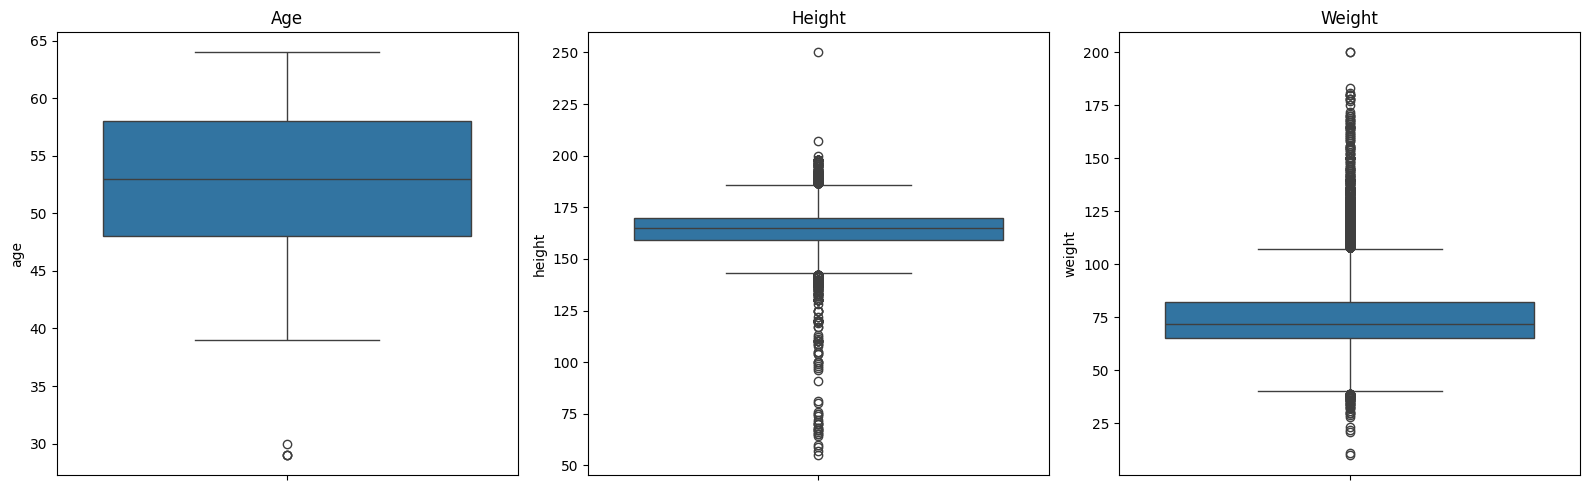

In [ ]:
#Include plots for EDA

# Visualizing age, height, and weight for outliers
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
age = df['age'] // 365
sns.boxplot(data=df, y=age, ax=axes[0]).set_title('Age')
sns.boxplot(data=df, y="height", ax=axes[1]).set_title('Height')
sns.boxplot(data=df, y="weight", ax=axes[2]).set_title('Weight')
# sns.boxplot(data=df, y="", ax=axes[2]).set_title('Weight')


plt.tight_layout()
plt.show()



4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   **Your answer for Hypothesis Testing goes here **

      1. Most people who have cardiovascular diseases have:
              a. Most are middle-aged to old
              b. Weight - should be mid to obese
              c. low ap_hi
              d. low glucose levels
              e. High cholesterol levels
  Using the plots below I visualized the data and was able to see that the data was similar to these points.
5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

   **Insert code for Handling Sparse/Dense Data and Outliers below**

In [ ]:
# The data for Age, Height, and Weight can be described as dense
# most of the values are concentrated in specific ranges with no large gaps indicative of sparsity.
# The outliers present in the plots do not necessarily indicate sparsity; they simply represent variation within the dataset.

#add categories
df['height']=df['height']*0.01
df['bmi'] = (df['weight'] / (df['height'] ** 2)).astype('int')
# df['age'] = (df['age'] / 365).round().astype('int')

# Define BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Apply the function to create a new feature
df['bmi_category'] = df['bmi'].apply(categorize_bmi)
# Define mapping dictionary
bmi_mapping = {'Underweight': 0, 'Normal': 1, 'Obese': 2}
# Map values in the category column using the mapping dictionary
df['bmi_category']= df['bmi_category'].map(bmi_mapping)

# Define age groups
def categorize_age(age):
    if age < 40:
        return 'Young'
    elif 40 <= age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

# Apply the function to create a new feature
df['age_group'] = df['age'].apply(categorize_age)
# Define mapping dictionary
age_mapping = {'Young': 0, 'Middle-aged': 1, 'Senior': 2}
# Map values in the category column using the mapping dictionary
df['age_group']= df['age_group'].map(age_mapping)

# Define blood pressure categories
def categorize_bp(ap_hi, ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return 'Normal'
    elif ap_hi >= 140 or ap_lo >= 90:
        return 'Hypertension'
    else:
        return 'High-Normal'

# Apply the function to create a new feature
df['bp_category'] = df.apply(lambda row: categorize_bp(row['ap_hi'], row['ap_lo']), axis=1)
# Define mapping dictionary
bp_mapping = {'Normal': 0, 'Hypertension': 1, 'High-Normal': 2}
# Map values in the category column using the mapping dictionary
df['bp_category']= df['bp_category'].map(bp_mapping)

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,age_group,bp_category
0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,21,1.0,2,2
1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,34,2.0,2,1
2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,23,1.0,2,2
3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,28,NaN,2,1
4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,23,1.0,2,0


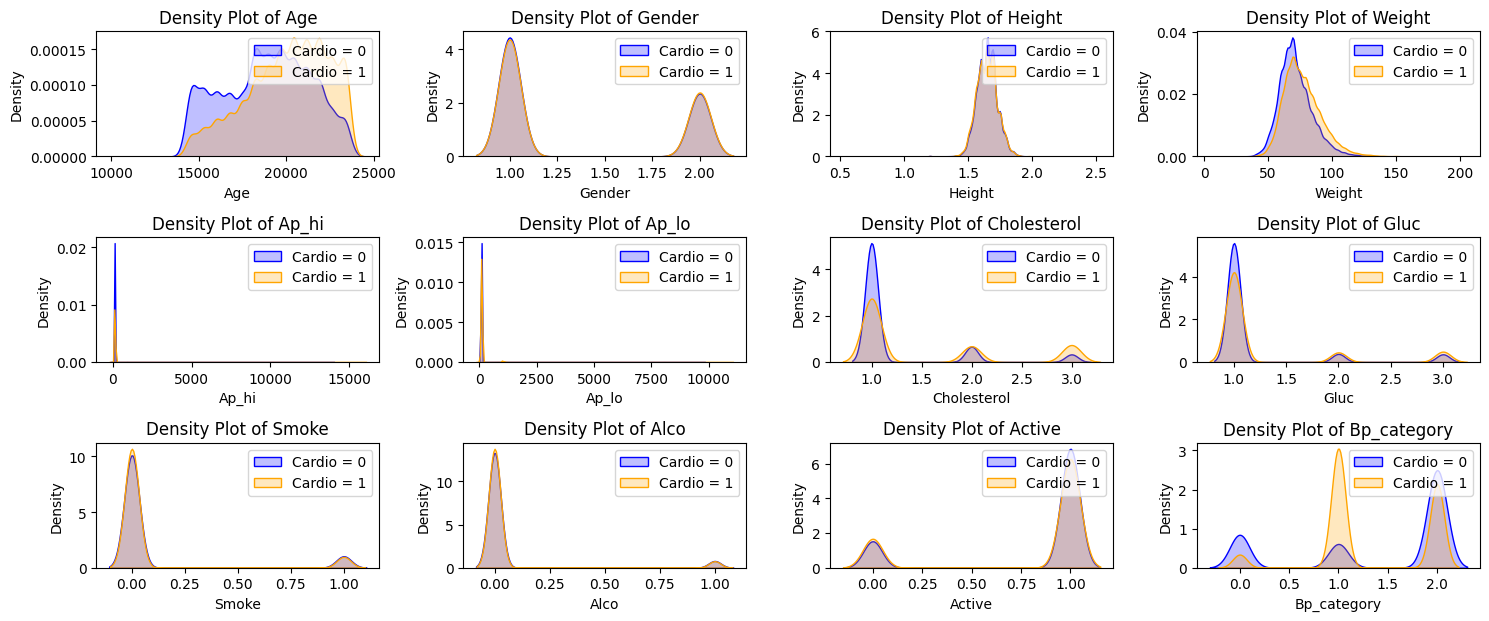

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a list of the columns to plot
columns_to_plot = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active',	'bp_category']

# Create subplots for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 4, i)
    sns.kdeplot(df[df['cardio'] == 0][column], color='blue', fill=True, label='Cardio = 0')
    sns.kdeplot(df[df['cardio'] == 1][column], color='orange', fill=True, label='Cardio = 1')
    plt.title(f'Density Plot of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Density')
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.
          - Dataset is split into train and test sets using a ratio of 80%:20%.
          - The train set is further split into train and validation sets into 75% and 25%.
7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    **Your answer for Hypothesis Testing goes here **



In [ ]:
# set X as all columns except 'Cardio'
# X = df.drop('cardio', axis=1).to_numpy()
# df['age'] = df['age'] // 365
X = df.drop('cardio', axis=1)
print(X.shape)
# set Y as target - 'cardio'
# Y = df['cardio'].to_numpy()
Y = df['cardio']
print(Y.shape)


# data was split into training and testing data
# Training data is further split into train and validation sets
print("\nTrain and test sets")
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("\nTrain and validation sets")
# Split the Train dataset to validation set and train set
train_x, X_val, train_y, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(train_x.shape, train_y.shape)
print(X_val.shape, y_val.shape)


(70000, 15)
(70000,)

Train and test sets
(56000, 15) (56000,)
(14000, 15) (14000,)

Train and validation sets
(42000, 15) (42000,)
(14000, 15) (14000,)


8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your working code-wise **
 ##### According to the heat below used to show how different features correlate with 'cardio', the strongest/best features are:
        - Age:  positive correlation with the 'cardio' variable (0.24). It should be retained.
        - Ap_hi (Systolic BP): Has a noticeable positive correlation with 'cardio' (0.22).
        - Cholesterol: With a correlation coefficient of 0.22 with 'cardio', it is an important feature.
        - Weight: It has a correlation coefficient of 0.18 with 'cardio'.
Other features such as ap_lo, height and others did not have very high correlation values but are very relevant cardiovascular diseases hence I decided to retain them. Also, they serve different purposes, i.e some are behavioral features while others are metabolic indicators and other categories.

9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   [**insert text for preprocessing steps**]


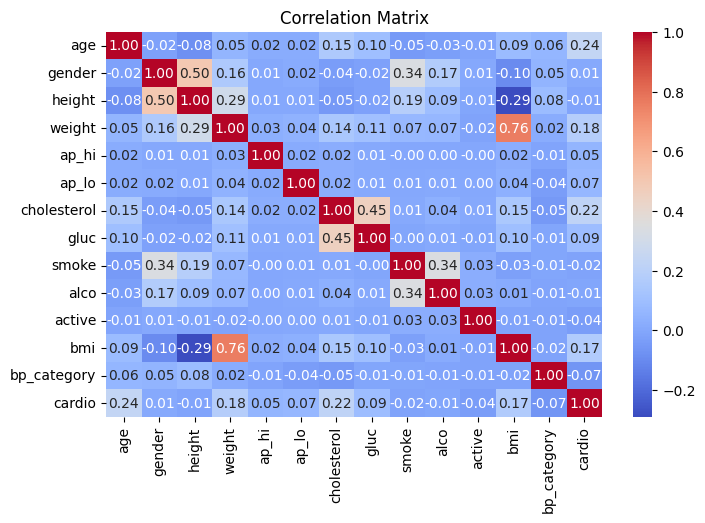

In [ ]:
#print out relevant features
numeric_feature = ['age', 'gender', 'height',	'weight',	'ap_hi',	'ap_lo', 'cholesterol',	'gluc',	'smoke',	'alco',	'active','bmi',	'bp_category', 'cardio']
# Test if All features above are important for training the model

# Create a subset of the DataFrame with only numeric features
numeric_df = df[numeric_feature]

# Correlation matrix to see how features correlate with cardio
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.

In [ ]:
print("Before scaling")
print(train_x[:1], "- features training set")
print("X-train shape: ", train_x.shape)
print()
print(train_y[:1], "- Target value training set")
print("Y-train shape: ", train_y.shape)
print()
print(X_test[:1], "- features test set")
print("X-test shape: ", X_train.shape)
print()
print(y_test[:1], "- target value test set")
print("Y-test shape: ", y_test.shape)
print()
print(X_val[:1], "- features validation set")
print("X-val shape: ", X_val.shape)
print()
print(y_val[:1], "- Target value validation set")
print("Y-val shape: ", y_val.shape)

Before scaling
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
12641  22511       2    1.68    84.0    130     90            1     1      1   

       alco  active  bmi  bmi_category  age_group  bp_category  
12641     1       1   29           NaN          2            1   - features training set
X-train shape:  (42000, 15)

12641    1
Name: cardio, dtype: int64 - Target value training set
Y-train shape:  (42000,)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
46730  21770       1    1.56    64.0    140     80            2     1      0   

       alco  active  bmi  bmi_category  age_group  bp_category  
46730     0       1   26           NaN          2            1   - features test set
X-test shape:  (56000, 15)

46730    1
Name: cardio, dtype: int64 - target value test set
Y-test shape:  (14000,)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10234  23490       1    1.61    52.0    105

In [ ]:
import joblib
print("After scaling")

scaler = StandardScaler()
scaler.fit(train_x)
joblib.dump(scaler, 'scaler.pkl')

x_train_scaled = scaler.transform(train_x)
print(x_train_scaled[:1], "- features training set")
print("X-train shape: ", x_train_scaled.shape)
print()
print(train_y[:1], "- Target value training set")
print("Y-train shape: ", train_y.shape)
print()
x_test_scaled = scaler.transform(X_test)
print(x_test_scaled[:1], "- features test set")
print("X-test shape: ", x_test_scaled.shape)
print()
print(y_test[:1], "- target value test set")
print("Y-test shape: ", y_test.shape)
print()
x_val_scaled = scaler.transform(X_val)
print(x_val_scaled[:1], "- features validation set")
print("X-val shape: ", x_val_scaled.shape)
print()
print(y_val[:1], "- Target value validation set")
print("Y-val shape: ", y_val.shape)

After scaling
[[ 1.23437062  1.36641498  0.44829519  0.68810327  0.00733121 -0.03588044
  -0.54191773 -0.39895933  3.20124842  4.15366507  0.49512162  0.32283312
          nan  0.         -0.52177068]] - features training set
X-train shape:  (42000, 15)

12641    1
Name: cardio, dtype: int64 - Target value training set
Y-train shape:  (42000,)

[[ 0.93422771 -0.73184209 -1.02100896 -0.70859459  0.06949521 -0.0838734
   0.93049426 -0.39895933 -0.31237813 -0.24075124  0.49512162 -0.1733425
          nan  0.         -0.52177068]] - features test set
X-test shape:  (14000, 15)

46730    1
Name: cardio, dtype: int64 - target value test set
Y-test shape:  (14000,)

[[ 1.63091572 -0.73184209 -0.4087989  -1.54661331 -0.1480788  -0.13186635
  -0.54191773 -0.39895933 -0.31237813 -0.24075124  0.49512162 -1.16569374
  -0.74035818  0.         -1.92196034]] - features validation set
X-val shape:  (14000, 15)

10234    0
Name: cardio, dtype: int64 - Target value validation set
Y-val shape:  (14000,)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

import numpy as np

In [ ]:
from keras.callbacks import LearningRateScheduler
input_shape = x_train_scaled.shape[1]
print(input_shape)
model = Sequential()
model.add(Dense(500, input_dim=input_shape, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Implement a learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

callback = LearningRateScheduler(scheduler)

# Compile the model with an optimizer and learning rate
model.compile(loss=binary_crossentropy,
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])
model.save('model.h5')
joblib.dump(model, 'model.pkl')

model.summary()


15
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 500)               8000      
                                                                 
 dense_22 (Dense)            (None, 128)               64128     
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 16)                528       
                                                                 
 dense_26 (Dense)            (None, 8)                 136       
                                                                 
 dense_27 (Dense)            (None, 1)             

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

train_model = model.fit(x_train_scaled, train_y,
                  # batch_size=128,
                  epochs=20,
                  verbose=1,
                  callbacks=[callback],
                  validation_data=(x_val_scaled, y_val))


Epoch 1/20
1313/1313 [==============================] - 8s 5ms/step - loss: nan - accuracy: 0.5016 - val_loss: nan - val_accuracy: 0.4975 - lr: 1.0000e-04
Epoch 2/20
1313/1313 [==============================] - 8s 6ms/step - loss: nan - accuracy: 0.5016 - val_loss: nan - val_accuracy: 0.4975 - lr: 1.0000e-04
Epoch 3/20
1313/1313 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.5016 - val_loss: nan - val_accuracy: 0.4975 - lr: 1.0000e-04
Epoch 4/20
1313/1313 [==============================] - 8s 6ms/step - loss: nan - accuracy: 0.5016 - val_loss: nan - val_accuracy: 0.4975 - lr: 1.0000e-04
Epoch 5/20
1313/1313 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.5016 - val_loss: nan - val_accuracy: 0.4975 - lr: 1.0000e-04
Epoch 6/20
1313/1313 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.5016 - val_loss: nan - val_accuracy: 0.4975 - lr: 1.0000e-04
Epoch 7/20
1313/1313 [==============================] - 8s 6ms/step - 

Train: 0.502, Test: 0.499


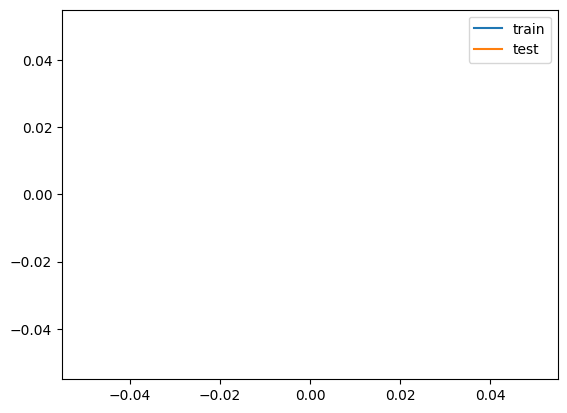

In [ ]:
_, train_acc = model.evaluate(x_train_scaled, train_y, verbose=0)
_, test_acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
plt.plot(train_model.history['loss'], label='train')
plt.plot(train_model.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# evaluate the model
score = model.evaluate(x_test_scaled, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5436358451843262
Test accuracy: 0.7383571267127991
